In [1]:
import tensorflow as tf

# Use TensorFlow 2.x style configuration
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)

        # Set the fraction of GPU memory to be used
        tf.config.experimental.set_virtual_device_configuration(
            gpus[0],
            [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=0.5)]
        )
    except RuntimeError as e:
        print(e)

In [2]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [3]:
IMAGE_SIZE = [224, 224]

train_path = 'E:\\MediaPiped Dataset\\train'
valid_path = 'E:\\MediaPiped Dataset\\test'

In [4]:
# Suppress deprecation warnings
import tensorflow.compat.v1 as tf
tf.logging.set_verbosity(tf.logging.ERROR)

In [5]:
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [6]:
for layer in inception.layers:
    layer.trainable = False

In [7]:
folders = glob('E:\\MediaPiped Dataset\\train\\*')

In [8]:
folders

['E:\\MediaPiped Dataset\\train\\A',
 'E:\\MediaPiped Dataset\\train\\B',
 'E:\\MediaPiped Dataset\\train\\C',
 'E:\\MediaPiped Dataset\\train\\D',
 'E:\\MediaPiped Dataset\\train\\E',
 'E:\\MediaPiped Dataset\\train\\F',
 'E:\\MediaPiped Dataset\\train\\G',
 'E:\\MediaPiped Dataset\\train\\H',
 'E:\\MediaPiped Dataset\\train\\I',
 'E:\\MediaPiped Dataset\\train\\J',
 'E:\\MediaPiped Dataset\\train\\K',
 'E:\\MediaPiped Dataset\\train\\L',
 'E:\\MediaPiped Dataset\\train\\M',
 'E:\\MediaPiped Dataset\\train\\N',
 'E:\\MediaPiped Dataset\\train\\O',
 'E:\\MediaPiped Dataset\\train\\P',
 'E:\\MediaPiped Dataset\\train\\Q',
 'E:\\MediaPiped Dataset\\train\\R',
 'E:\\MediaPiped Dataset\\train\\S',
 'E:\\MediaPiped Dataset\\train\\T',
 'E:\\MediaPiped Dataset\\train\\U',
 'E:\\MediaPiped Dataset\\train\\V',
 'E:\\MediaPiped Dataset\\train\\W',
 'E:\\MediaPiped Dataset\\train\\X',
 'E:\\MediaPiped Dataset\\train\\Y',
 'E:\\MediaPiped Dataset\\train\\Z']

In [9]:
x = Flatten()(inception.output)

In [10]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [11]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 111, 111, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 111, 111, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 111, 111, 32)         0         ['batch_normalization[0][0

In [12]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [14]:
training_set = train_datagen.flow_from_directory('E:/MediaPiped Dataset/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 13000 images belonging to 26 classes.


In [15]:
test_set = test_datagen.flow_from_directory('E:/MediaPiped Dataset/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 5200 images belonging to 26 classes.


In [16]:
# Train the model using the fit method
r = model.fit(
    training_set,
    validation_data=test_set,
    epochs=4,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set)
)

Epoch 1/4
407/407 [==============================] - 713s 2s/step - loss: 0.8302 - accuracy: 0.9541 - val_loss: 0.8788 - val_accuracy: 0.9213
Epoch 2/4
407/407 [==============================] - 697s 2s/step - loss: 0.4214 - accuracy: 0.9832 - val_loss: 0.5700 - val_accuracy: 0.9579
Epoch 3/4
407/407 [==============================] - 730s 2s/step - loss: 0.4600 - accuracy: 0.9872 - val_loss: 1.4284 - val_accuracy: 0.9271
Epoch 4/4
407/407 [==============================] - 713s 2s/step - loss: 0.4818 - accuracy: 0.9897 - val_loss: 1.6810 - val_accuracy: 0.9635


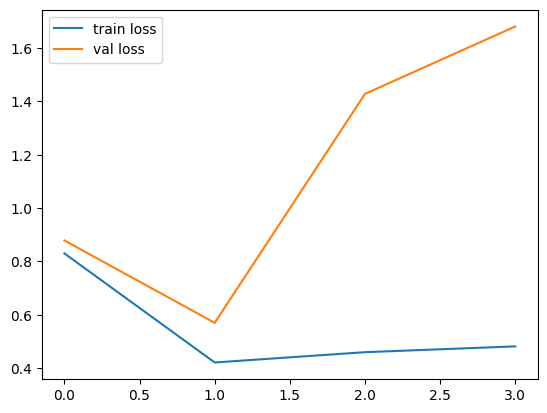

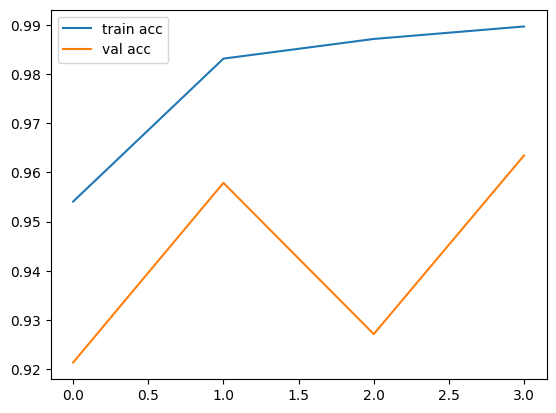

<Figure size 640x480 with 0 Axes>

In [17]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('E:\\MediaPiped Dataset\\graphs\\LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('E:\\MediaPiped Dataset\\graphs\\AccVal_acc')

In [18]:
from tensorflow.keras.models import load_model

model.save('E:\\MediaPiped Dataset\\trained_models\\inceptionV3_model.keras')

In [19]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

model_path = 'E:\\MediaPiped Dataset\\trained_models\\inceptionV3_model.keras'
inceptionV3_model = load_model(model_path)

In [20]:
test_data_path = 'E:/MediaPiped Dataset/test'

In [21]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [22]:
test_generator = test_datagen.flow_from_directory(
    test_data_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 5200 images belonging to 26 classes.


In [23]:
test_loss, test_accuracy = inceptionV3_model.evaluate(test_generator)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

163/163 [==============================] - 171s 1s/step - loss: 1.6810 - accuracy: 0.9635
Test Loss: 1.6810
Test Accuracy: 96.35%


In [24]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [25]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

In [26]:
import os
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def load_and_preprocess_test_data(dataset_path, subset, start_index=1000, end_index=1099):
    images = []
    labels = []

    test_folder = os.path.join(dataset_path, subset)

    # Iterate through alphabet folders
    for alphabet_folder in sorted(os.listdir(test_folder)):
        alphabet_images_folder = os.path.join(test_folder, alphabet_folder)

        # Iterate through images in the alphabet folder
        for filename in sorted(os.listdir(alphabet_images_folder)):
            if filename.endswith(('.jpg', '.png', '.jpeg')):
                img_index = int(filename.split('.')[0])

                if start_index <= img_index <= end_index:
                    img_path = os.path.join(alphabet_images_folder, filename)

                    print(f"Processing image: {img_path}")

                    # Load image
                    img = cv2.imread(img_path)

                    if img is None:
                        print(f"Failed to load image: {img_path}")
                        continue

                    # Resize the image to the specified size
                    img = cv2.resize(img, (224, 224))

                    # Normalize the pixel values to be between 0 and 1
                    img = img.astype(np.float32) / 255.0

                    # Append the image and label to the lists
                    images.append(img)
                    labels.append(ord(alphabet_folder) - ord('A'))  # Convert alphabet to label (0 to 25)

    x_test = np.array(images)
    y_test = np.array(labels)

    # Print debugging information
    print(f"Number of test images processed: {len(images)}")

    return x_test, y_test


# Load the trained InceptionV3 model
model_path = "E:\\MediaPiped Dataset\\trained_models\\inceptionV3_model.h5"
inceptionV3_model = load_model(model_path)

# Example usage
dataset_path = "E:\\MediaPiped Dataset"
x_test, y_test = load_and_preprocess_test_data(dataset_path, 'test', start_index=1000, end_index=1099)

Processing image: E:\MediaPiped Dataset\test\A\1000.jpg
Processing image: E:\MediaPiped Dataset\test\A\1001.jpg
Processing image: E:\MediaPiped Dataset\test\A\1002.jpg
Processing image: E:\MediaPiped Dataset\test\A\1003.jpg
Processing image: E:\MediaPiped Dataset\test\A\1004.jpg
Processing image: E:\MediaPiped Dataset\test\A\1005.jpg
Processing image: E:\MediaPiped Dataset\test\A\1006.jpg
Processing image: E:\MediaPiped Dataset\test\A\1007.jpg
Processing image: E:\MediaPiped Dataset\test\A\1008.jpg
Processing image: E:\MediaPiped Dataset\test\A\1009.jpg
Processing image: E:\MediaPiped Dataset\test\A\1010.jpg
Processing image: E:\MediaPiped Dataset\test\A\1011.jpg
Processing image: E:\MediaPiped Dataset\test\A\1012.jpg
Processing image: E:\MediaPiped Dataset\test\A\1013.jpg
Processing image: E:\MediaPiped Dataset\test\A\1014.jpg
Processing image: E:\MediaPiped Dataset\test\A\1015.jpg
Processing image: E:\MediaPiped Dataset\test\A\1016.jpg
Processing image: E:\MediaPiped Dataset\test\A\1

In [27]:
# loading InceptionV3 Model
inceptionV3_model = load_model('E:\\MediaPiped Dataset\\trained_models\\inceptionV3_model.keras')

In [28]:
inceptionV3_predictions = inceptionV3_model.predict(x_test)

82/82 [==============================] - 94s 1s/step


In [29]:
# Convert predictions to class labelsl
y_pred = np.argmax(inceptionV3_predictions, axis=1)

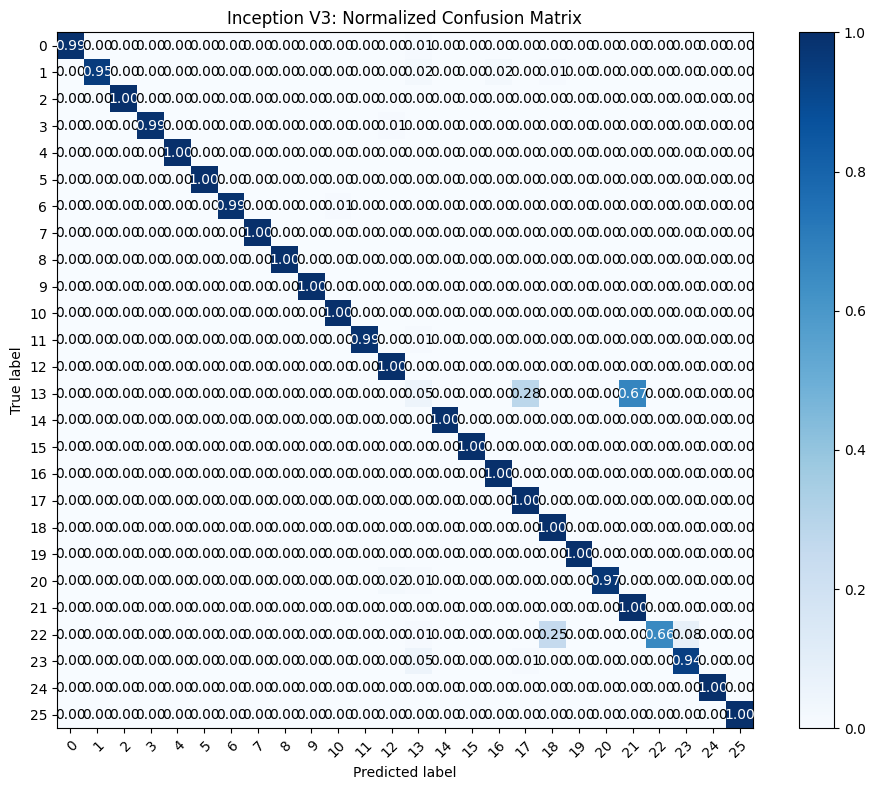

In [30]:
# # Compute confusion matrix
# conf_matrix = confusion_matrix(y_test, y_pred)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

# Replace y_pred with the actual predictions from your model
# In this case, using inceptionV3_predictions for illustration
y_pred = np.argmax(inceptionV3_predictions, axis=1)

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues,
                          figsize=(10, 8)):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Inception V3: Normalized Confusion Matrix'
        else:
            title = 'Confusion Matrix, Without Normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    fig, ax = plt.subplots(figsize=figsize)
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

# Get the unique class labels from y_test
classes = unique_labels(y_test)

# Call the function to plot the confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=classes, normalize=True)

# Show the plot
plt.show()



In [31]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.utils.multiclass import unique_labels
from sklearn.exceptions import UndefinedMetricWarning
import warnings
# Calculate precision, recall, and f1-score
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

In [32]:
# Print the calculated metrics
print(f'Weighted Precision: {precision:.4f}')
print(f'Weighted Recall: {recall:.4f}')
print(f'Weighted F1-Score: {f1:.4f}')

Weighted Precision: 0.9363
Weighted Recall: 0.9435
Weighted F1-Score: 0.9319


In [33]:
# Compute classification report
class_report = classification_report(y_test, y_pred)

In [34]:
# Print classification report
print("\nClassification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       100
           1       1.00      0.95      0.97       100
           2       1.00      1.00      1.00       100
           3       1.00      0.99      0.99       100
           4       1.00      1.00      1.00       100
           5       1.00      1.00      1.00       100
           6       1.00      0.99      0.99       100
           7       1.00      1.00      1.00       100
           8       1.00      1.00      1.00       100
           9       1.00      1.00      1.00       100
          10       0.99      1.00      1.00       100
          11       1.00      0.99      0.99       100
          12       0.97      1.00      0.99       100
          13       0.31      0.05      0.09       100
          14       1.00      1.00      1.00       100
          15       1.00      1.00      1.00       100
          16       0.98      1.00      0.99       100
   

In [35]:
# Convert predictions to binary (0 or 1)
inceptionV3_predictions_binary = (inceptionV3_predictions > 0.5).astype(int)

In [36]:
print("Shape of y_test:", y_test.shape)
print("Shape of inceptionV3_predictions_binary:", inceptionV3_predictions_binary.shape)

Shape of y_test: (2600,)
Shape of inceptionV3_predictions_binary: (2600, 26)


In [37]:
# Calculate accuracy for InceptionV3 model
inceptionV3_accuracy = accuracy_score(y_test, inceptionV3_predictions_binary.argmax(axis=1))

print(f"InceptionV3 Accuracy: {inceptionV3_accuracy * 100:.2f}%")

InceptionV3 Accuracy: 94.35%


In [38]:
#RESNET-50 ARCHITECTURE:

In [39]:
# importing necessary libraries
import os
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [40]:
# dataset path
dataset_path = "E:\\MediaPiped Dataset"

In [41]:
# set height and width of images
img_height, img_width = 224, 224
batch_size = 32

In [42]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [43]:
train_generator = train_datagen.flow_from_directory(
    os.path.join(dataset_path, 'train'),
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 13000 images belonging to 26 classes.


In [44]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

In [45]:
base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_2[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                       

In [46]:
for layer in base_model.layers:
    layer.trainable = True

In [47]:
num_classes = 26
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dense(num_classes, activation='softmax')
])

In [48]:
# Model Compilation
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [49]:
model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=4
)

Epoch 1/4
406/406 [==============================] - 3250s 8s/step - loss: 0.1811 - accuracy: 0.9543
Epoch 2/4
406/406 [==============================] - 2947s 7s/step - loss: 0.0738 - accuracy: 0.9821
Epoch 3/4
406/406 [==============================] - 2539s 6s/step - loss: 0.0282 - accuracy: 0.9937
Epoch 4/4
406/406 [==============================] - 3404s 8s/step - loss: 0.0375 - accuracy: 0.9912


In [50]:
# Save trained model
model.save("E:\\MediaPiped Dataset\\trained_models\\resnet50_model.keras")

In [51]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [52]:
test_generator = test_datagen.flow_from_directory(
    os.path.join(dataset_path, 'test'),
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 5200 images belonging to 26 classes.


In [53]:
test_loss, test_accuracy = model.evaluate(test_generator)

163/163 [==============================] - 354s 2s/step - loss: 0.4299 - accuracy: 0.9181


In [54]:
# Printing test loss and test accuracy
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Test Loss: 0.4299
Test Accuracy: 91.81%


In [55]:
# Loading ResNet-50 trained model
from tensorflow.keras.models import load_model
resnet50_model = load_model('E:\\MediaPiped Dataset\\trained_models\\resnet50_model.h5')

In [56]:
resnet50_predictions = resnet50_model.predict(x_test)

82/82 [==============================] - 170s 2s/step


In [57]:
# Convert predictions to class labels
y_pred = np.argmax(resnet50_predictions, axis=1)

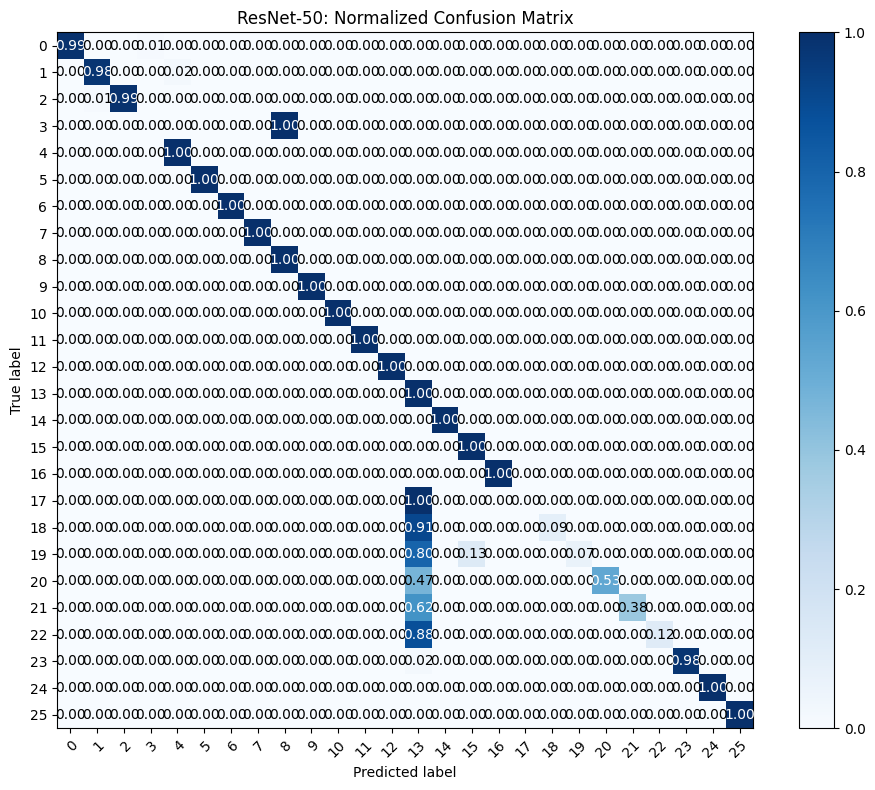

In [58]:
# # Compute confusion matrix
# conf_matrix = confusion_matrix(y_test, y_pred)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

# Replace y_pred with the actual predictions from your model
# In this case, using inceptionV3_predictions for illustration
y_pred = np.argmax(resnet50_predictions, axis=1)

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues,
                          figsize=(10, 8)):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'ResNet-50: Normalized Confusion Matrix'
        else:
            title = 'Confusion Matrix, Without Normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    fig, ax = plt.subplots(figsize=figsize)
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

# Get the unique class labels from y_test
classes = unique_labels(y_test)

# Call the function to plot the confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=classes, normalize=True)

# Show the plot
plt.show()



In [59]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.utils.multiclass import unique_labels
from sklearn.exceptions import UndefinedMetricWarning
import warnings
# Calculate precision, recall, and f1-score
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

In [60]:
# Print the calculated metrics
print(f'Weighted Precision: {precision:.4f}')
print(f'Weighted Recall: {recall:.4f}')
print(f'Weighted F1-Score: {f1:.4f}')

Weighted Precision: 0.8666
Weighted Recall: 0.7742
Weighted F1-Score: 0.7543


In [61]:
# Compute classification report
class_report = classification_report(y_test, y_pred)

C:\Users\ravik\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ravik\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ravik\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

In [62]:
# Print classification report
print("\nClassification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       100
           1       0.99      0.98      0.98       100
           2       1.00      0.99      0.99       100
           3       0.00      0.00      0.00       100
           4       0.98      1.00      0.99       100
           5       1.00      1.00      1.00       100
           6       1.00      1.00      1.00       100
           7       1.00      1.00      1.00       100
           8       0.50      1.00      0.67       100
           9       1.00      1.00      1.00       100
          10       1.00      1.00      1.00       100
          11       1.00      1.00      1.00       100
          12       1.00      1.00      1.00       100
          13       0.18      1.00      0.30       100
          14       1.00      1.00      1.00       100
          15       0.88      1.00      0.94       100
          16       1.00      1.00      1.00       100
   

In [63]:
resnet50_predictions_binary = (resnet50_predictions > 0.5).astype(int)

In [64]:
print("Shape of y_test:", y_test.shape)
print("Shape of resnet50_predictions_binary:", resnet50_predictions_binary.shape)

Shape of y_test: (2600,)
Shape of resnet50_predictions_binary: (2600, 26)


In [65]:
# Calculate accuracy for ResNet-50 model
resnet50_accuracy = accuracy_score(y_test, resnet50_predictions_binary.argmax(axis=1))

print(f"ResNet-50 Accuracy: {resnet50_accuracy * 100:.2f}%")

ResNet-50 Accuracy: 76.81%


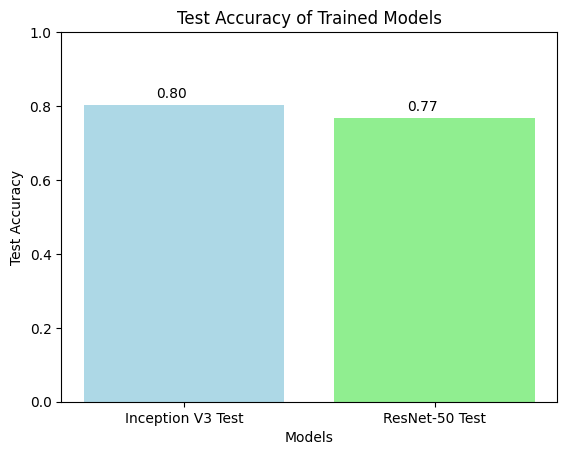

In [66]:
import matplotlib.pyplot as plt

# Replace these variables with the actual test accuracy values from your trained models
test_acc_inceptionv3 = 0.8023
test_acc_resnet50 = 0.7681

# Model names for the bar graph
model_names = ['Inception V3 Test', 'ResNet-50 Test']

# Test accuracy values for the bar graph
test_accuracy_values = [test_acc_inceptionv3, test_acc_resnet50]

# Colors
light_blue = '#ADD8E6'
light_green = '#90EE90'
# Plotting the bar graph
bars = plt.bar(model_names, test_accuracy_values, color=[light_blue, light_green])
plt.xlabel('Models')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy of Trained Models')
plt.ylim(0, 1)  # Set the y-axis range to represent accuracy percentage (0-100%)

# Adding text labels on top of each bar
for bar, accuracy in zip(bars, test_accuracy_values):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.05, bar.get_height() + 0.02, f'{accuracy:.2f}', ha='center', color='black')
    
plt.show()


In [67]:
# Real-time Text Prediction:

In [68]:
pip install opencv-python mediapipe tensorflow

In [69]:
# %%writefile hand_recognition_script.py

# import cv2
# import mediapipe as mp
# import numpy as np
# from tensorflow.keras.models import load_model
# from multiprocessing import Process, Queue

# # Load the trained model (Replace 'resnet50_model.h5' with your actual model file)
# model = load_model('E:\\MediaPiped Dataset\\trained_models\\resnet50_model.h5')

# # Initialize Mediapipe Hands module
# mp_hands = mp.solutions.hands
# hands = mp_hands.Hands()

# # Initialize Mediapipe Drawing module
# mp_drawing = mp.solutions.drawing_utils

# # Function to run model inference
# def inference_process(queue, frame, landmarks):
#     # Crop the region of interest (ROI) around the hand
#     hand_roi = frame[landmarks[1]:landmarks[1] + landmarks[3], landmarks[0]:landmarks[0] + landmarks[2]]

#     # Resize the hand ROI to match the input size of the model
#     hand_roi = cv2.resize(hand_roi, (224, 224), interpolation=cv2.INTER_AREA)

#     # Expand dimensions to match the model's expected input shape
#     hand_roi = np.expand_dims(hand_roi, axis=0)

#     # Add a dummy third dimension to simulate the channel dimension
#     hand_roi = np.expand_dims(hand_roi, axis=3)

#     # Make prediction using the loaded model
#     prediction = model.predict(hand_roi)

#     # Get the predicted alphabet
#     predicted_alphabet = chr(ord('A') + np.argmax(prediction))

#     # Put the prediction result in the queue
#     queue.put(predicted_alphabet)

# # Open webcam
# cap = cv2.VideoCapture(0)

# # Get the frame width and height
# width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
# height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# # Run the video capture loop
# while cap.isOpened():
#     ret, frame = cap.read()
#     if not ret:
#         continue

#     # Flip the frame horizontally for a later selfie-view display
#     frame = cv2.flip(frame, 1)

#     # Convert the BGR image to RGB
#     rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

#     # Process the frame with Mediapipe Hands
#     results = hands.process(rgb_frame)

#     # Check if hands are detected
#     if results.multi_hand_landmarks:
#         for hand_landmarks in results.multi_hand_landmarks:
#             # Extract hand landmarks
#             landmarks = np.array([[int(landmark.x * width), int(landmark.y * height)] for landmark in hand_landmarks.landmark])

#             # Get the bounding box around the hand
#             bbox = cv2.boundingRect(np.array(landmarks, dtype=np.int32))

#             # Draw hand landmarks on the frame
#             mp_drawing.draw_landmarks(frame, hand_landmarks, mp_hands.HAND_CONNECTIONS)

#             # Run model inference in a separate process
#             prediction_queue = Queue()
#             process = Process(target=inference_process, args=(prediction_queue, frame.copy(), bbox))
#             process.start()
#             process.join()

#             # Get the predicted alphabet from the queue
#             predicted_alphabet = prediction_queue.get()

#             # Display the predicted alphabet near the hand
#             cv2.putText(frame, predicted_alphabet, (bbox[0], bbox[1]),
#                         cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)

#     # Display the frame
#     cv2.imshow('Sign Language Recognition', frame)

#     # Break the loop when 'q' is pressed
#     if cv2.waitKey(1) & 0xFF == ord('q'):
#         break

# # Release the capture and close all windows
# cap.release()
# cv2.destroyAllWindows()


In [12]:
# with open('hand_recognition_script.py', 'r') as file:
#     print(file.read())


import cv2
import mediapipe as mp
import numpy as np
from tensorflow.keras.models import load_model
from multiprocessing import Process, Queue

# Load the trained model (Replace 'resnet50_model.h5' with your actual model file)
model = load_model('E:\\MediaPiped Dataset\\trained_models\\resnet50_model.h5')

# Initialize Mediapipe Hands module
mp_hands = mp.solutions.hands
hands = mp_hands.Hands()

# Initialize Mediapipe Drawing module
mp_drawing = mp.solutions.drawing_utils

# Function to run model inference
def inference_process(queue, frame, landmarks):
    # Crop the region of interest (ROI) around the hand
    hand_roi = frame[landmarks[1]:landmarks[1] + landmarks[3], landmarks[0]:landmarks[0] + landmarks[2]]

    # Resize the hand ROI to match the input size of the model
    hand_roi = cv2.resize(hand_roi, (224, 224), interpolation=cv2.INTER_AREA)

    # Expand dimensions to match the model's expected input shape
    hand_roi = np.expand_dims(hand_roi, axis=0)

    # Add a dummy t

In [1]:
import cv2
import mediapipe as mp
import numpy as np
from tensorflow.keras.models import load_model

# Load the pre-trained model
model = load_model('E:\\MediaPiped Dataset\\trained_models\\resnet50_model.h5')

cap = cv2.VideoCapture(0)

mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

hands = mp_hands.Hands(static_image_mode=True, min_detection_confidence=0.3)

labels_dict = {0: 'A', 1: 'B', 2: 'C', 3: 'I'}  # Assuming your model outputs integers for classes

while True:
    data_aux = []
    x_ = []
    y_ = []

    ret, frame = cap.read()

    # Check if a frame is successfully captured
    if not ret:
        print("Error reading frame. Exiting...")
        break

    H, W, _ = frame.shape

    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    results = hands.process(frame_rgb)

    if results.multi_hand_landmarks:
        for hand_landmarks in results.multi_hand_landmarks:
            mp_drawing.draw_landmarks(
                frame,
                hand_landmarks,
                mp_hands.HAND_CONNECTIONS,
                mp_drawing_styles.get_default_hand_landmarks_style(),
                mp_drawing_styles.get_default_hand_connections_style())

        for hand_landmarks in results.multi_hand_landmarks:
            for i in range(len(hand_landmarks.landmark)):
                x = hand_landmarks.landmark[i].x
                y = hand_landmarks.landmark[i].y

                x_.append(x)
                y_.append(y)

            for i in range(len(hand_landmarks.landmark)):
                x = hand_landmarks.landmark[i].x
                y = hand_landmarks.landmark[i].y
                data_aux.append(x - min(x_))
                data_aux.append(y - min(y_))

        # Convert data_aux to a numpy array
        data_aux = np.array(data_aux).reshape(1, -1)

        x1 = int(min(x_) * W) - 10
        y1 = int(min(y_) * H) - 10

        x2 = int(max(x_) * W) - 10
        y2 = int(max(y_) * H) - 10

        prediction = model.predict(data_aux)

        predicted_class = np.argmax(prediction[0])
        predicted_character = labels_dict[predicted_class]

        cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 0, 0), 4)
        cv2.putText(frame, predicted_character, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 1.3, (0, 0, 0), 3,
                    cv2.LINE_AA)

    cv2.imshow('frame', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

ValueError: in user code:

    File "C:\Users\ravik\AppData\Roaming\Python\Python39\site-packages\keras\src\engine\training.py", line 2440, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\ravik\AppData\Roaming\Python\Python39\site-packages\keras\src\engine\training.py", line 2425, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\ravik\AppData\Roaming\Python\Python39\site-packages\keras\src\engine\training.py", line 2413, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\ravik\AppData\Roaming\Python\Python39\site-packages\keras\src\engine\training.py", line 2381, in predict_step
        return self(x, training=False)
    File "C:\Users\ravik\AppData\Roaming\Python\Python39\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\ravik\AppData\Roaming\Python\Python39\site-packages\keras\src\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 224, 224, 3), found shape=(None, 42)
